# Implementation of the K-SVD article : 


```bibtex
@ARTICLE{1710377,
  author={Aharon, M. and Elad, M. and Bruckstein, A.},
  journal={IEEE Transactions on Signal Processing}, 
  title={K-SVD: An algorithm for designing overcomplete dictionaries for sparse representation}, 
  year={2006},
  volume={54},
  number={11},
  pages={4311-4322},
  keywords={Algorithm design and analysis;Dictionaries;Matching pursuit algorithms;Pursuit algorithms;Clustering algorithms;Iterative algorithms;Prototypes;Inverse problems;Feature extraction;Signal design;Atom decomposition;basis pursuit;codebook;dictionary;FOCUSS;gain-shape VQ;matching pursuit;sparse representation;training;vector quantization},
  doi={10.1109/TSP.2006.881199}}
```

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Substitute 'pyor' if it's an actual library style
# set seed
np.random.seed(0)

In [ ]:
N = 20 # number of training signals 
n = 70 # size of each signal
K = 8 # number of atoms in dict
T0 = 3 # number of non zero coefficients

The objectize is to solve this optimisation problem :
$$
\min_{D,X} \{ ||Y-DX||_F^2\} \quad \text{subject to : } \quad \forall i \, , ||x_i||_0\le T_0
$$


## Create N signals of size n

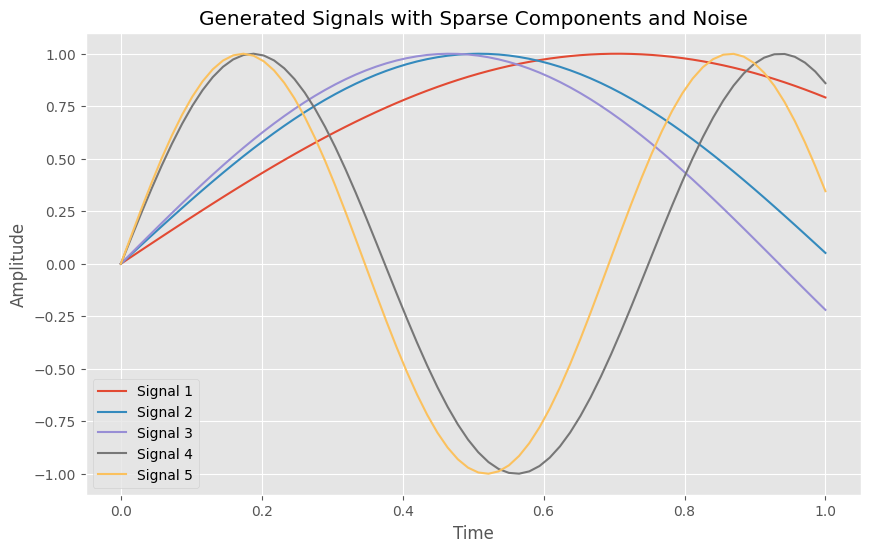

(70, 20)


In [17]:
frequencies = np.sort(np.random.uniform(0.3, 3, N))  # Random frequencies between 0.5 and 3 Hz
noise_level = 0.00  # Adjusted noise level

# Initialize signal matrix
Y = np.zeros((n, N))
time = np.linspace(0, 1, n)

for i in range(N):
    
    # Generate a base signal (sine wave at the chosen frequency)
    signal = np.sin(2 * np.pi * frequencies[i] * time) 
    noisy_signal = signal + noise_level * np.random.randn(n)
    
    
    # Store the signal
    Y[:, i] = noisy_signal

# Plot a few example signals
plt.figure(figsize=(10, 6))
for i in range(min(5, N)):  # Plotting only the first 5 signals as an example
    plt.plot(time, Y[:, i], label=f'Signal {i+1}')
plt.title('Generated Signals with Sparse Components and Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(Y.shape)


## Initialise the Dictionary without prior

In [18]:
# create dictionary D with K atoms of size (n,K) and normalize each atom

idxs = np.random.choice(N, K, replace=False)
# initialise with random signals
D = Y[:, idxs]
# normalise each atom
D /= np.linalg.norm(D, axis=0)
print(D.shape)


(70, 8)


## Implement an Orthogonal Matching Pursuit for the sparse coding stage

(8, 20)


/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)
/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)
/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)
/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit en

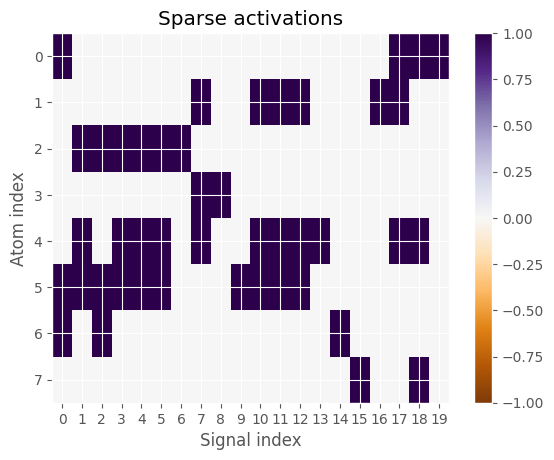

[ True  True  True  True  True  True False  True False False  True  True
  True False False False False  True  True False]


In [19]:
from sklearn.linear_model import OrthogonalMatchingPursuit

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=T0)

X = np.zeros((K, N))
for i in range(N):
    omp.fit(D, Y[:, i])
    X[:, i] = omp.coef_

print(X.shape)
# get non-zero indices
nonzero_indices = np.where(X != 0, 1, 0)
# Plot the sparse activations
plt.figure()
plt.imshow(nonzero_indices, aspect='auto', cmap='PuOr', vmin=-1, vmax=1)
plt.title('Sparse activations')
plt.colorbar()
plt.xticks(np.arange(N))
plt.xlabel('Signal index')
plt.ylabel('Atom index')
plt.show()

# assert the sum over axis 0 is equal to T0
print(np.sum(nonzero_indices, axis=0) == T0 * np.ones(N))

## Codebook Update Stage

Processing atom 0
Error Before SVD k = 0: 12.2306
        - Atom 0, is used by signals : [ 0 17 18 19]


<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:60: SyntaxWarning: invalid escape sequence '\O'
<>:70: SyntaxWarning: invalid escape sequence '\O'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:60: SyntaxWarning: invalid escape sequence '\O'
<>:70: SyntaxWarning: invalid escape sequence '\O'
/var/folders/fy/j5txzwmn2j129vjt9kw2b8_40000gn/T/ipykernel_67051/1352824838.py:52: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_title(f'Non-zero indices : $\omega_{k}$ colored')
/var/folders/fy/j5txzwmn2j129vjt9kw2b8_40000gn/T/ipykernel_67051/1352824838.py:60: SyntaxWarning: invalid escape sequence '\O'
  ax3.set_title(f'Omega for dict k : $\Omega_{k}$')
/var/folders/fy/j5txzwmn2j129vjt9kw2b8_40000gn/T/ipykernel_67051/1352824838.py:70: SyntaxWarning: invalid escape sequence '\O'
  ax4.set_title(f'$E_{k}$@$\Omega_{k}$')


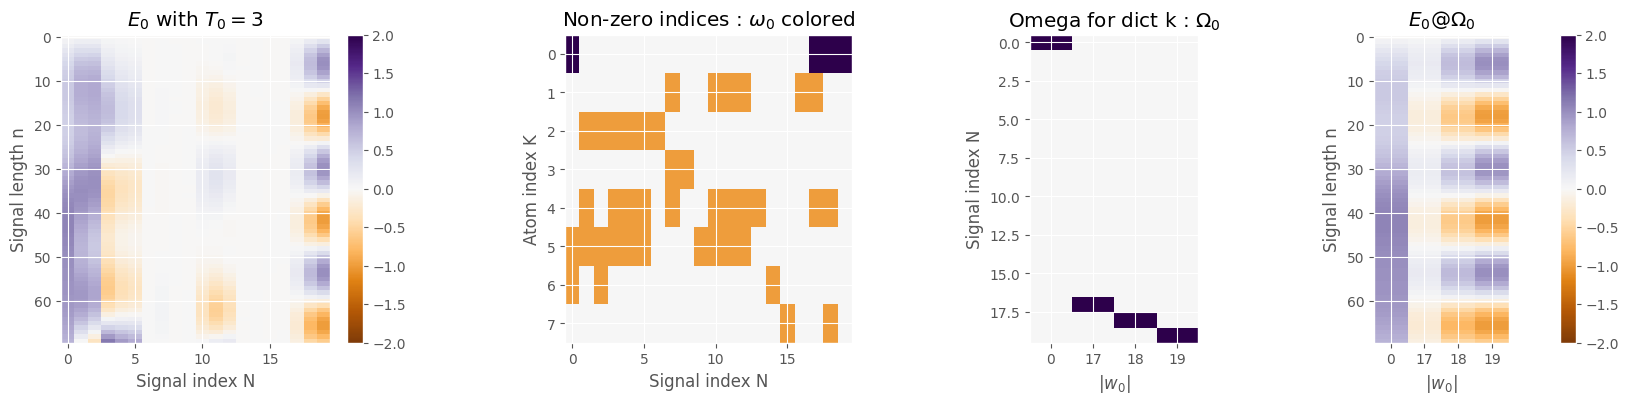

        - Shapes are : E_k_R (70, 4), d_k (70,), x_k_R (4,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (4,)
    - Reduced Error before SVD : 6.59
    - Reduced Error after SVD : 6.54
Error After SVD k = 0: 12.2041
---------
Processing atom 1
Error Before SVD k = 1: 12.2041
        - Atom 1, is used by signals : [ 7 10 11 12 16 17]


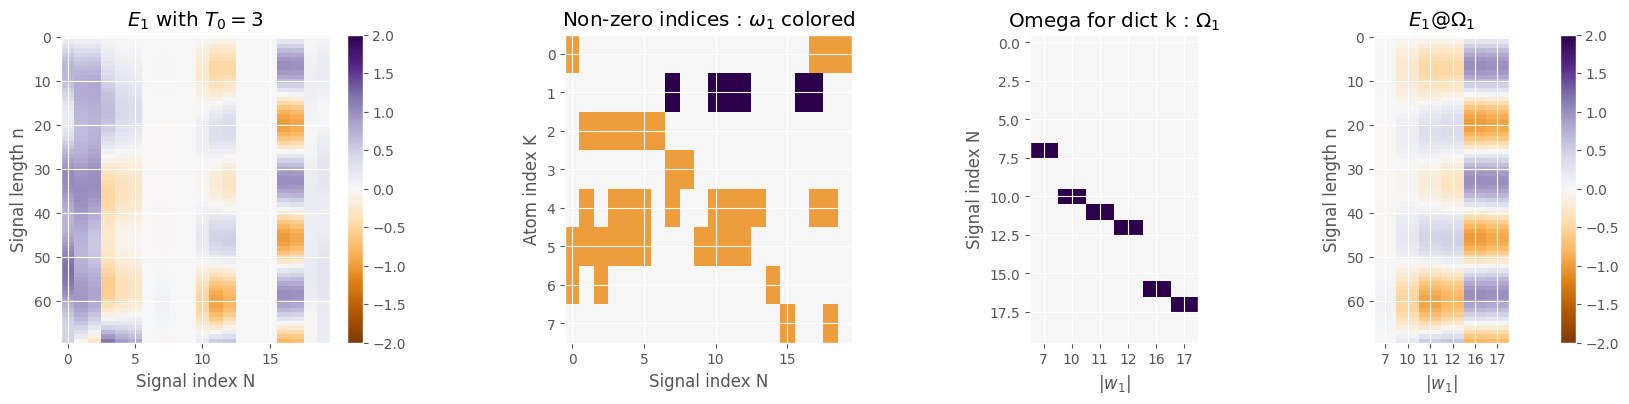

        - Shapes are : E_k_R (70, 6), d_k (70,), x_k_R (6,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (6,)
    - Reduced Error before SVD : 2.55
    - Reduced Error after SVD : 2.25
Error After SVD k = 1: 12.1465
---------
Processing atom 2
Error Before SVD k = 2: 12.1465
        - Atom 2, is used by signals : [1 2 3 4 5 6]


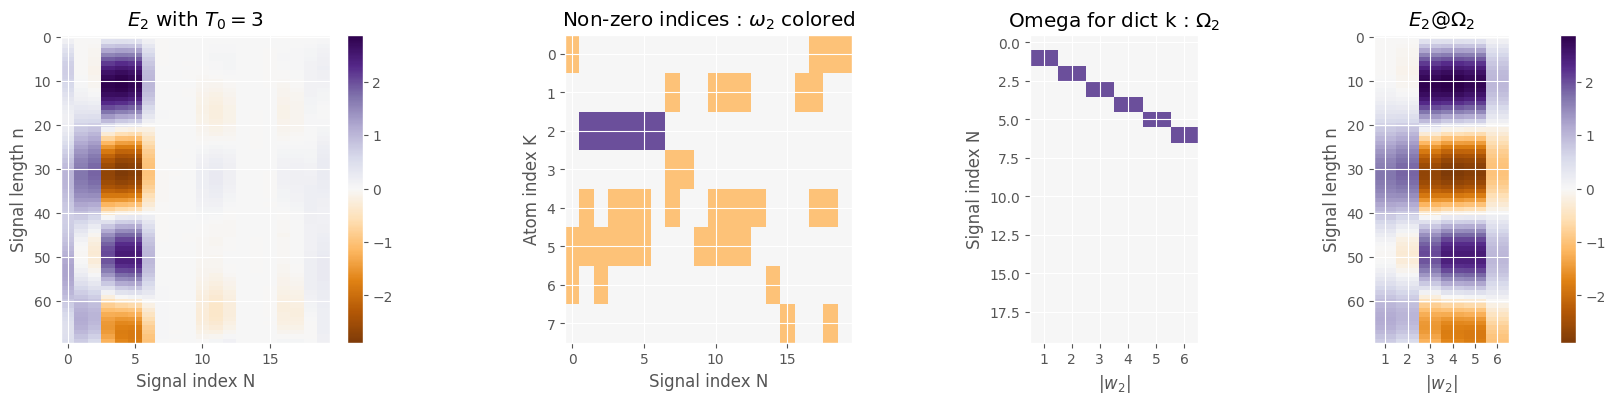

        - Shapes are : E_k_R (70, 6), d_k (70,), x_k_R (6,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (6,)
    - Reduced Error before SVD : 9.99
    - Reduced Error after SVD : 8.49
Error After SVD k = 2: 10.9492
---------
Processing atom 3
Error Before SVD k = 3: 10.9492
        - Atom 3, is used by signals : [7 8]


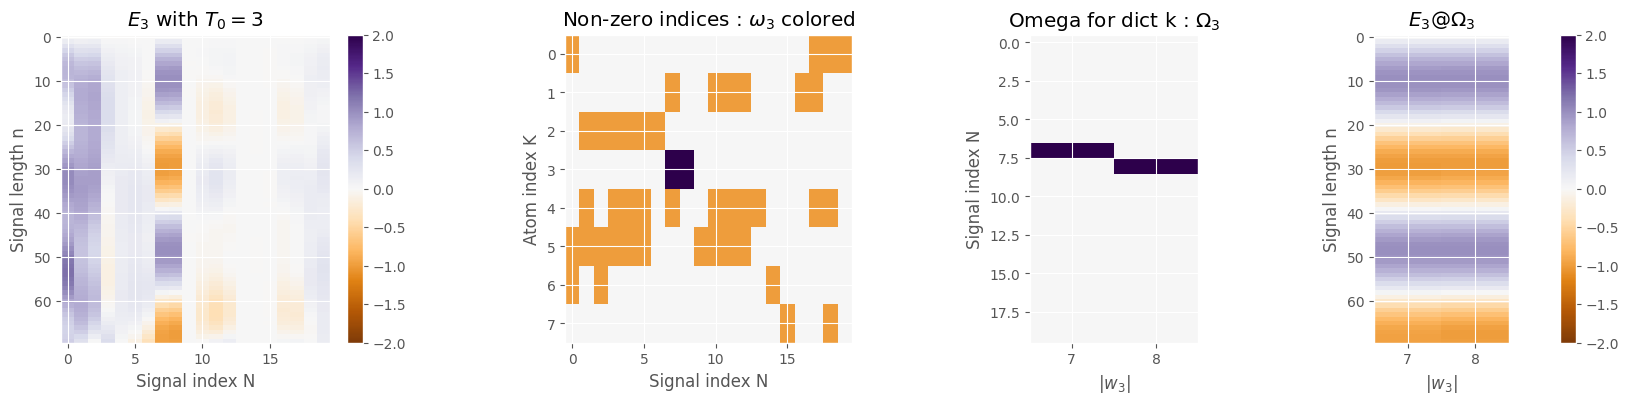

        - Shapes are : E_k_R (70, 2), d_k (70,), x_k_R (2,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (2,)
    - Reduced Error before SVD : 0.17
    - Reduced Error after SVD : 0.12
Error After SVD k = 3: 10.9486
---------
Processing atom 4
Error Before SVD k = 4: 10.9486
        - Atom 4, is used by signals : [ 1  3  4  5  7 10 11 12 13 17 18]


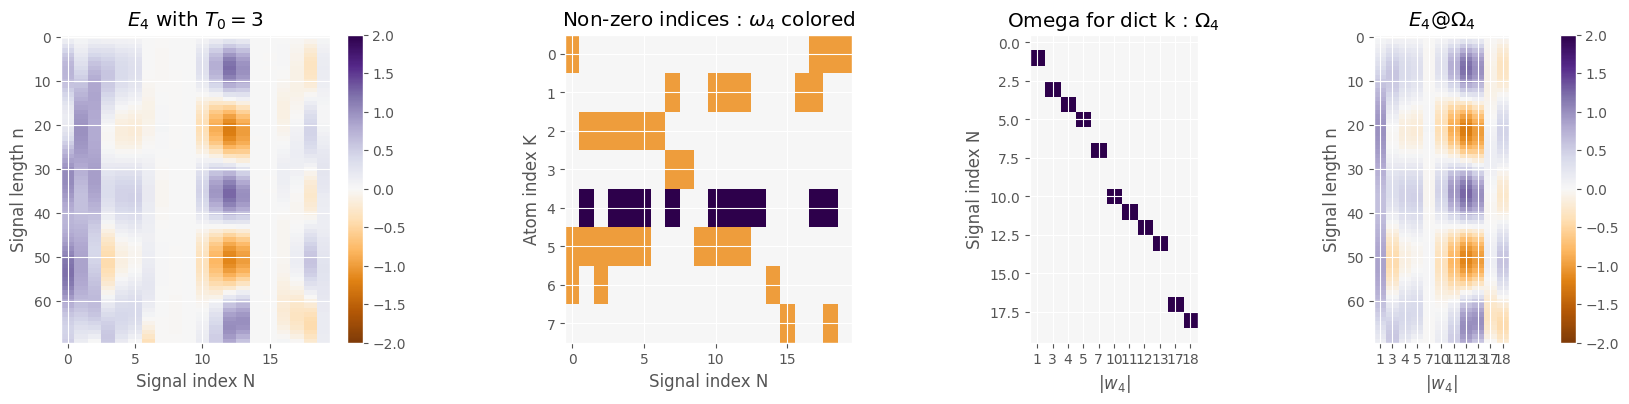

        - Shapes are : E_k_R (70, 11), d_k (70,), x_k_R (11,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (11,)
    - Reduced Error before SVD : 6.75
    - Reduced Error after SVD : 6.54
Error After SVD k = 4: 10.8215
---------
Processing atom 5
Error Before SVD k = 5: 10.8215
        - Atom 5, is used by signals : [ 0  1  2  3  4  5  9 10 11 12]


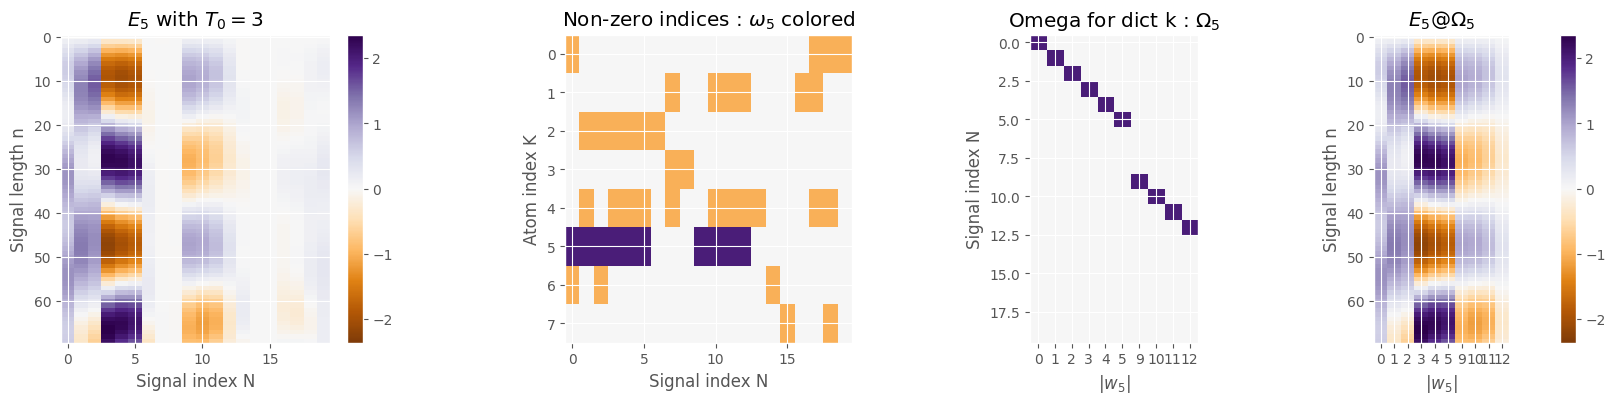

        - Shapes are : E_k_R (70, 10), d_k (70,), x_k_R (10,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (10,)
    - Reduced Error before SVD : 10.55
    - Reduced Error after SVD : 10.51
Error After SVD k = 5: 10.7817
---------
Processing atom 6
Error Before SVD k = 6: 10.7817
        - Atom 6, is used by signals : [ 0  2 14]


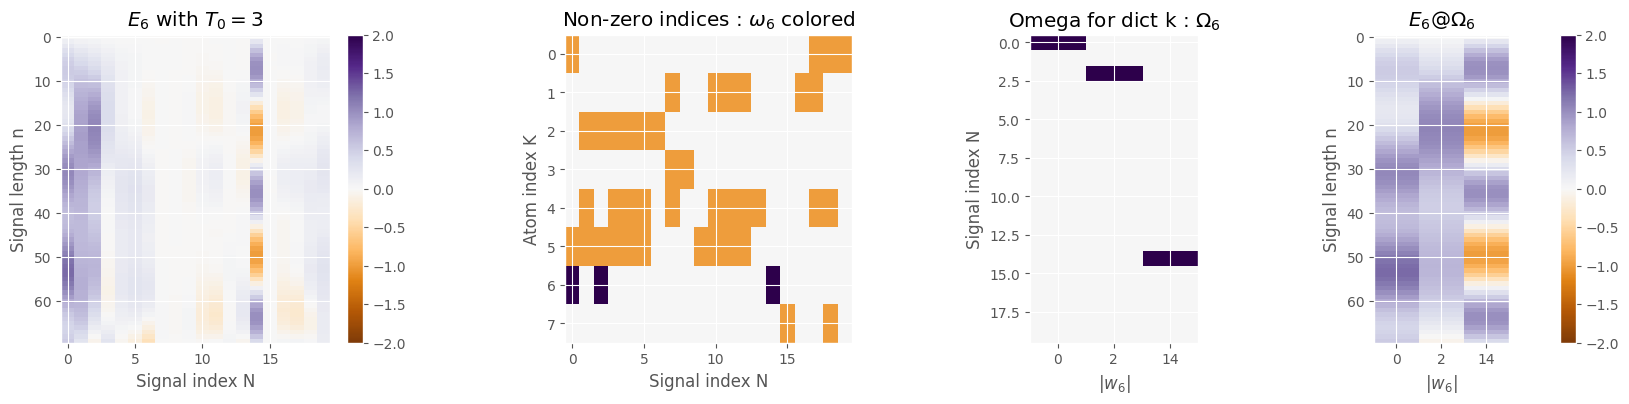

        - Shapes are : E_k_R (70, 3), d_k (70,), x_k_R (3,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (3,)
    - Reduced Error before SVD : 8.37
    - Reduced Error after SVD : 6.35
Error After SVD k = 6: 9.3049
---------
Processing atom 7
Error Before SVD k = 7: 9.3049
        - Atom 7, is used by signals : [15 18]


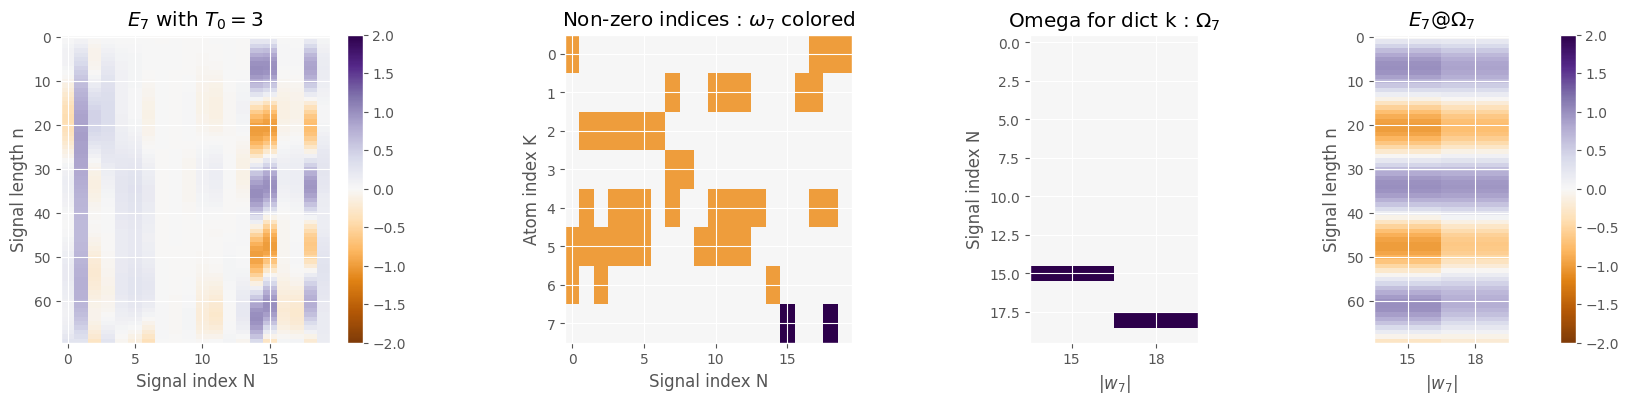

        - Shapes are : E_k_R (70, 2), d_k (70,), x_k_R (2,), x_k (20,)
        - Shapes are : d_k_hat (70,), x_k_hat (2,)
    - Reduced Error before SVD : 0.91
    - Reduced Error after SVD : 0.71
Error After SVD k = 7: 9.2877
---------


In [20]:
from numpy.linalg import svd

E_t = Y - D@X
error_t = np.linalg.norm(E_t)

for k in range(K):
    
    print(f"Processing atom {k}")
    E_t = Y - D@X
    error_t = np.linalg.norm(E_t)
    # compute the overall error matrix for atom k : ie exclude atom k from the dictionary and compute the error
    E_k = Y - D@X + np.outer(D[:, k], X[k, :])
    print(f"Error Before SVD k = {k}: {error_t:.4f}")
    x_k = X[k, :] # row k of X
    d_k = D[:, k] # column k of D

    # get the indices of the signals that use atom k
    indices = np.where(X[k, :] != 0)[0]
    print(f'        - Atom {k}, is used by signals : {indices}')
    if len(indices) == 0:
        print(f'        - Atom {k} is not used by any signal')
        continue    
    else :
        # create the Omega_k matrix
        Omega_k = np.zeros((N, len(indices)))
        for i, idx in enumerate(indices):
            Omega_k[idx, i] = 1

        if 1==1 :
            nonzero_indices_k = nonzero_indices*-1
            nonzero_indices_k[k, indices] = 2

            vmin = min(E_k.min(), nonzero_indices_k.min(), (E_k @ Omega_k).min())
            vmax = max(E_k.max(), nonzero_indices_k.max(), (E_k @ Omega_k).max())
            vlim = max(abs(vmin), abs(vmax))

            # Create the figure
            fig = plt.figure(figsize=(20, 4))

            ax1 = plt.subplot(141)
            cax1 = ax1.imshow(E_k, aspect='auto', cmap='PuOr', vmin=-vlim, vmax=vlim)
            ax1.set_title(f'$E_{k}$ with $T_0={T0}$')
            plt.xlabel('Signal index N')
            plt.ylabel('Signal length n')
            
            fig.colorbar(cax1, ax=ax1)
            pos1 = ax1.get_position()
            ax1.set_position([pos1.x0, pos1.y0, pos1.width, pos1.height])

            ax2 = plt.subplot(142)
            cax2 = ax2.imshow(nonzero_indices_k, aspect='auto', cmap='PuOr', vmin=-vlim, vmax=vlim)
            ax2.set_title(f'Non-zero indices : $\omega_{k}$ colored')
            plt.xlabel('Signal index N')
            plt.ylabel('Atom index K')
            pos2 = ax2.get_position()
            ax2.set_position([pos2.x0 + 0.05, pos2.y0, pos2.width * 0.85, pos2.height])

            ax3 = plt.subplot(143)
            cax3 = ax3.imshow(Omega_k*2, aspect='auto', cmap='PuOr', vmin=-vlim, vmax=vlim)
            ax3.set_title(f'Omega for dict k : $\Omega_{k}$')
            plt.xlabel(f'$|w_{k}|$')
            plt.ylabel('Signal index N')
            # xticks are the indices of the signals that use atom k 
            plt.xticks(np.arange(len(indices)), indices)
            pos3 = ax3.get_position()
            ax3.set_position([pos3.x0 + 0.08, pos3.y0, pos3.width * 0.5, pos3.height])

            ax4 = plt.subplot(144)
            cax4 = ax4.imshow(E_k @ Omega_k, aspect='auto', cmap='PuOr', vmin=-vlim, vmax=vlim)
            ax4.set_title(f'$E_{k}$@$\Omega_{k}$')
            plt.xlabel(f'$|w_{k}|$')
            plt.ylabel('Signal length n')
            plt.xticks(np.arange(len(indices)), indices)
            fig.colorbar(cax4, ax=ax4)
            pos4 = ax4.get_position()
            ax4.set_position([pos4.x0 + 0.05, pos4.y0, pos4.width * 0.5, pos4.height])

            plt.show()

        # Calculate the reduced error E_k_R, and reduced activation x_k_R
        E_k_R = E_k @ Omega_k
        x_k_R = x_k[indices]
        print(f"        - Shapes are : E_k_R {E_k_R.shape}, d_k {d_k.shape}, x_k_R {x_k_R.shape}, x_k {x_k.shape}")

        # Calculate the SVD of the reduced error
        U, S, V = svd(E_k_R)

        d_k_hat = U[:, 0]
        x_k_R_hat = S[0] * V[0, :]
        print(f"        - Shapes are : d_k_hat {d_k_hat.shape}, x_k_hat {x_k_R_hat.shape}")

        # calculate the error before SVD
        E_k_hat = E_k_R - np.outer(d_k, x_k_R)
        print(f"    - Reduced Error before SVD : {np.linalg.norm(E_k_hat):.2f}")

        # Calculate the error of the reduced error
        E_k_hat = E_k_R - np.outer(d_k_hat, x_k_R_hat)
        print(f"    - Reduced Error after SVD : {np.linalg.norm(E_k_hat):.2f}")

        x_k_hat = np.zeros(N)
        x_k_hat[indices] = x_k_R_hat

        # X[k, :] = x_k_hat
        # D[:, k] = d_k_hat
        X[k, :] = x_k_hat
        D[:, k] = d_k_hat

        E_t = Y - D@X
        error_t = np.linalg.norm(E_t)
        print(f"Error After SVD k = {k}: {error_t:.4f}")
        print("---------")

        # break

    

## Full K-SVD algorithm 

In [21]:
# import warnings
# # Suppress all RuntimeWarnings (or a specific message) globally in the script
# warnings.filterwarnings("ignore", category=RuntimeWarning)

In [22]:
def mp(D, Y, TO) :
    """
    Matching pursuit algorithm with fixed number of activations
    :param D: Dictionary matrix (n x K)
    :param Y: Signal (n)
    """
    n, K = D.shape
    x = np.zeros(K)
    r = Y
    for _ in range(TO):
        proj = D.T @ r
        k = np.argmax(np.abs(proj))
        x[k] += proj[k]
        r -= D[:, k] * proj[k]
    return x

(70, 8)
Initial error : 26.60


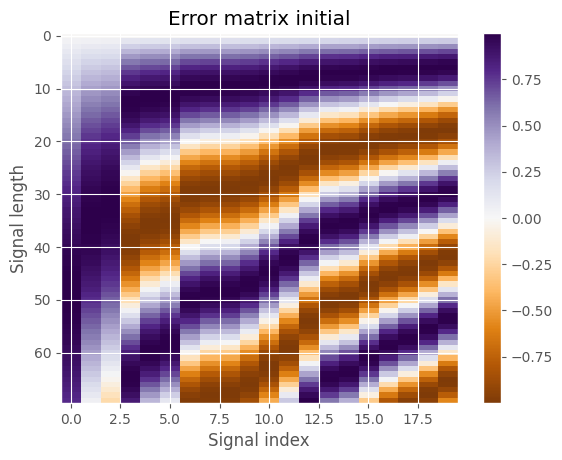

  0%|          | 0/80 [00:00<?, ?it/s]

Iteration 0
    - Error at iteration 0 before sparse coding : 26.5976
    - Error at iteration 0 after sparse coding : 24.6963
    - Error at iteration 0 and dict 0 during SVD : 22.4127
    - Error at iteration 0 and dict 1 during SVD : 18.3159
    - Error at iteration 0 and dict 2 during SVD : 16.6288
    - Error at iteration 0 and dict 3 during SVD : 14.9085
    - Error at iteration 0 and dict 4 during SVD : 12.7967
    - Error at iteration 0 and dict 5 during SVD : 10.4094
    - Error at iteration 0 and dict 6 during SVD : 10.4005
    - Error at iteration 0 and dict 7 during SVD : 9.1733
    - Error at iteration 0 final : 9.1733
Error : 9.1733
Iteration 1
    - Error at iteration 1 before sparse coding : 9.1733
    - Error at iteration 1 after sparse coding : 7.7289
    - Error at iteration 1 and dict 0 during SVD : 7.7289
    - Error at iteration 1 and dict 1 during SVD : 7.1834
    - Error at iteration 1 and dict 2 during SVD : 2.9292
    - Error at iteration 1 and dict 3 during S

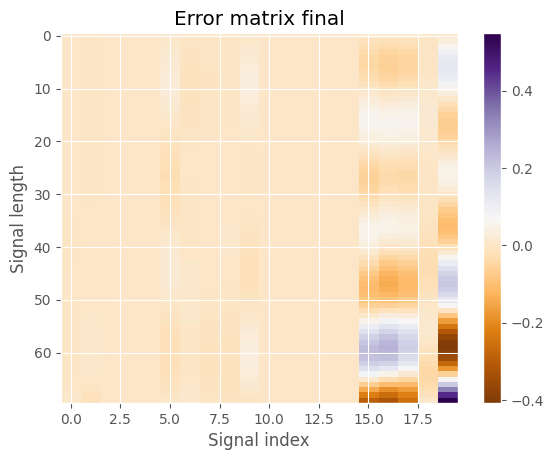

In [23]:
from tqdm.auto import tqdm


# alternate between sparse coding and dictionary update
# create dictionary D with K atoms of size (n,K) and normalize each atom

idxs = np.random.choice(N, K, replace=False)
# initialise with random signals
D = Y[:, idxs]
# normalise each atom
D /= np.linalg.norm(D, axis=0)
print(D.shape)


omp = OrthogonalMatchingPursuit(n_nonzero_coefs=T0, tol=1e-2)
X = np.zeros((K, N))

E_ini = Y - D@X
error_ini = np.linalg.norm(E_ini)   
v_lim = max(abs(E_ini.min()), abs(E_ini.max()))
print(f"Initial error : {error_ini:.2f}")

# imshow the error matrix
plt.figure()
plt.imshow(E_ini, aspect='auto', cmap='PuOr' , vmin=-v_lim, vmax=v_lim)
plt.title('Error matrix initial')
plt.colorbar()
plt.xlabel('Signal index')
plt.ylabel('Signal length')
plt.show()


MAX_ITER = 80

E_t = Y - D@X
error_t = np.linalg.norm(E_t)
lst_errors = []
lst_errors.append(error_t)

for _ in tqdm(range(MAX_ITER)) :
    print(f"Iteration {_}")
    E_t = Y - D@X
    error_t = np.linalg.norm(E_t)
    print(f"    - Error at iteration {_} before sparse coding : {error_t:.4f}")
    # Sparse coding step
    # omp.fit(D, Y)
    # X = omp.coef_.T
    for i in range(N):
        # omp.fit(D, Y[:, i])
        # X[:, i] = omp.coef_
        X[:, i] = mp(D, Y[:, i], T0)
    E_t_plus_1_t = Y - D@X
    error_t_plus_1 = np.linalg.norm(E_t_plus_1_t)
    print(f"    - Error at iteration {_} after sparse coding : {error_t_plus_1:.4f}")
    if error_t_plus_1 > error_t:
        print(f"    - Error increased at iteration {_} : {error_t_plus_1:.4f}")
        break
    # Dictionary update step
    for k in range(K):
        E_k = Y - D@X + np.outer(D[:, k], X[k, :])
        x_k = X[k, :] 
        d_k = D[:, k] 
        indices = np.where(X[k, :] != 0)[0]
        if len(indices) > 0:
            Omega_k = np.zeros((N, len(indices)))
            for i, idx in enumerate(indices):
                Omega_k[idx, i] = 1

            E_k_R = E_k @ Omega_k
            x_k_R = x_k[indices]

            U, S, V = svd(E_k_R)

            d_k_hat = U[:, 0]
            x_k_R_hat = S[0] * V[0, :]

            E_k_hat = E_k_R - np.outer(d_k_hat, x_k_R_hat)
            x_k_hat = np.zeros(N)
            x_k_hat[indices] = x_k_R_hat
            X[k, :] = x_k_hat
            D[:, k] = d_k_hat
        E_t_plus_1_t = Y - D@X
        error_t_plus_1 = np.linalg.norm(E_t_plus_1_t)
        print(f"    - Error at iteration {_} and dict {k} during SVD : {error_t_plus_1:.4f}")
        lst_errors.append(error_t_plus_1)
    E_t_plus_1 = Y - D@X
    error_t_plus_1 = np.linalg.norm(E_t_plus_1) 
    print(f"    - Error at iteration {_} final : {error_t_plus_1:.4f}")
    if _ % 50 == 0:
        tqdm.write(f"Error : {error_t_plus_1:.4f}")


    # check if the error has converged
    if np.abs((error_t_plus_1 - error_t)) < 1e-2:
        print(f"Converged at iteration {_}")
        break
    error_t = error_t_plus_1

    
print(f"Final error : {error_t_plus_1:.2f}")
# imshow the error matrix
plt.figure()
plt.imshow(E_t_plus_1, aspect='auto', cmap='PuOr')
plt.title('Error matrix final')
plt.colorbar()
plt.xlabel('Signal index')
plt.ylabel('Signal length')
plt.show()


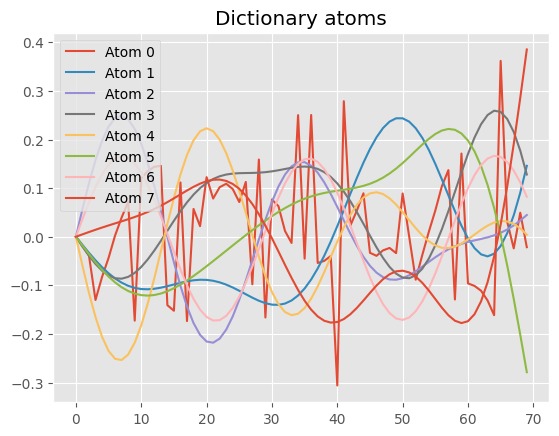

In [24]:
# plot dictionary appened
plt.figure()
for i in range(K):
    plt.plot(D[:, i], label=f'Atom {i}')
plt.title('Dictionary atoms')
plt.legend()
plt.show()

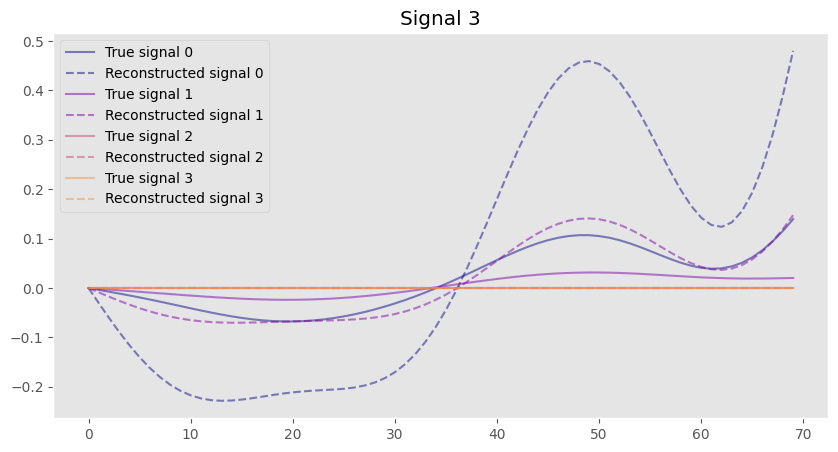

In [25]:
# plot the first true signals and the reconstructed signals
N_SIGNALS = 4
# Specify the color palette and linestyles
color_palette = plt.get_cmap("plasma")  # Diverging colormap
linestyle_true = '-'  # Solid line for true signal
linestyle_reconstructed = '--'  # Dashed line for reconstructed signal

# Create the plot
plt.figure(figsize=(10, 5))

colors = [color_palette(i / N_SIGNALS) for i in range(N_SIGNALS)]
for i in range(N_SIGNALS):

    # Plot the true signal with solid line
    plt.plot(Y[:, i], label=f'True signal {i}', color=colors[i], linestyle=linestyle_true, alpha=0.5)
    
    # Plot the reconstructed signal with dashed line
    plt.plot(D @ X[:, i], label=f'Reconstructed signal {i}', color=colors[i], linestyle=linestyle_reconstructed, alpha=0.5)

# Title and legend
plt.title(f'Signal {i}')
plt.legend()
plt.grid()
plt.show()

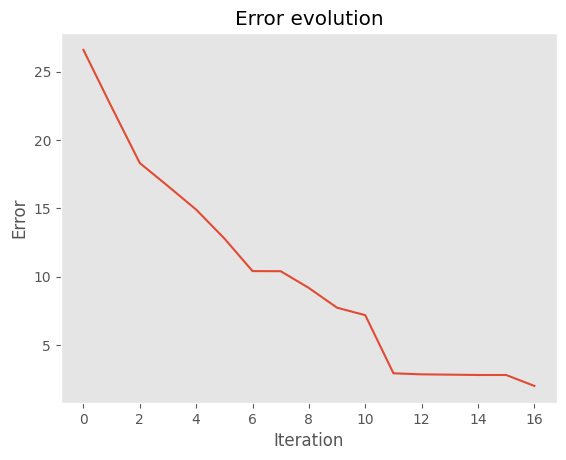

In [26]:
# plot the error evolution
plt.figure()
plt.plot(lst_errors)
plt.title('Error evolution')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid()
plt.show()

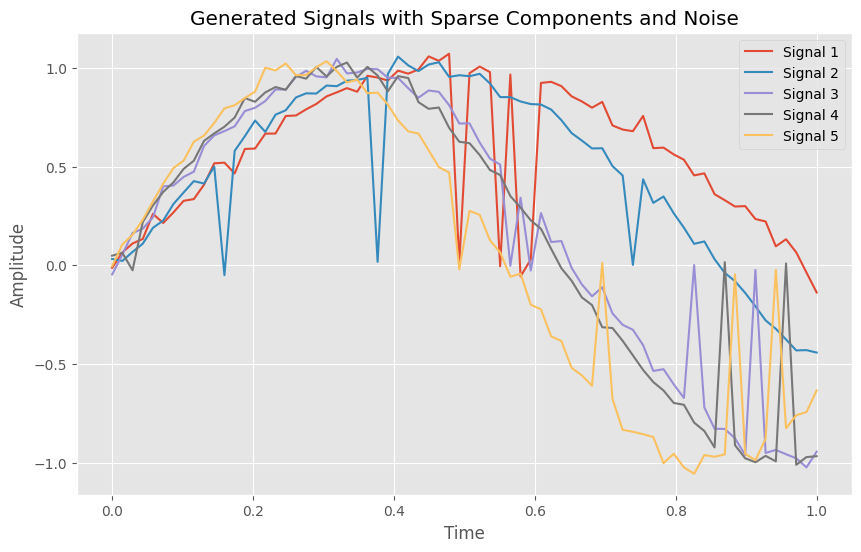

(70, 10)


In [27]:
N_test = 10

frequencies = np.sort(np.random.uniform(0.5, 3, N_test))  # Random frequencies between 0.5 and 3 Hz
sparsity_level = 0.95  # Sparse signal, 30% non-zero components
noise_level = 0.03  # Adjusted noise level

# Initialize signal matrix
Y_test = np.zeros((n, N_test))
time = np.linspace(0, 1, n)

for i in range(N_test):
    # Create a sparse signal by randomly choosing which indices will have non-zero values
    sparse_indices = np.random.choice(n, size=int(n * sparsity_level), replace=False)
    
    # Generate a base signal (sine wave at the chosen frequency)
    signal = np.sin(2 * np.pi * frequencies[i] * time)
    
    # Add random sparsity to the signal by zeroing out some values
    sparse_signal = np.zeros(n)
    sparse_signal[sparse_indices] = signal[sparse_indices]
    
    # Add noise to the signal
    noisy_signal = sparse_signal + noise_level * np.random.randn(n)
    
    # Store the signal
    Y_test[:, i] = noisy_signal


# Plot a few example signals
plt.figure(figsize=(10, 6))
for i in range(min(5, N_test)):  # Plotting only the first 5 signals as an example
    plt.plot(time, Y_test[:, i], label=f'Signal {i+1}')
plt.title('Generated Signals with Sparse Components and Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(Y_test.shape)

Error on test signals : 12.80


/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)
/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)
/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  return func(*args, **kwargs)
/Users/mathiasgrau/miniconda3/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:189: RuntimeWarning: Orthogonal matching pursuit en

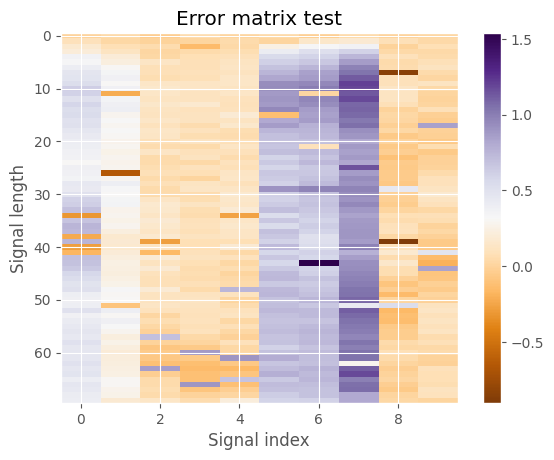

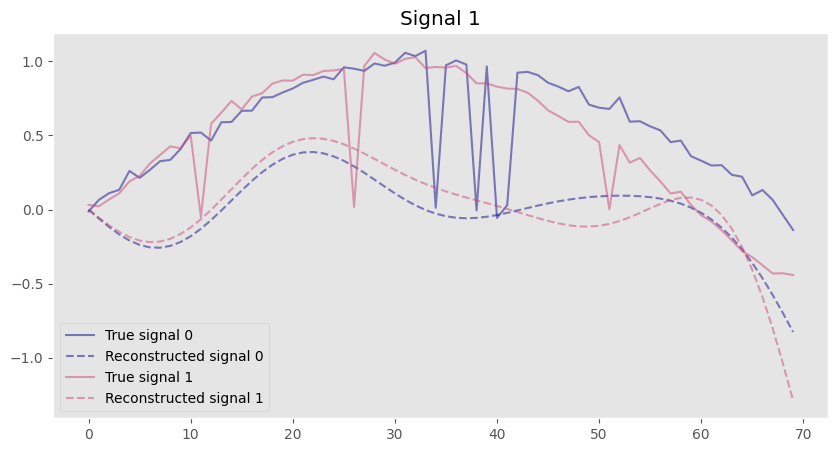

In [28]:
X_test = np.zeros((K, N_test))
for i in range(N_test):
    omp.fit(D, Y_test[:, i])
    X_test[:, i] = omp.coef_

# try to reconstruct the test signals
E_test = Y_test - D@X_test
error_test = np.linalg.norm(E_test)
print(f"Error on test signals : {error_test:.2f}")

# imshow the error matrix
plt.figure()
plt.imshow(E_test, aspect='auto', cmap='PuOr')
plt.title('Error matrix test')
plt.colorbar()
plt.xlabel('Signal index')
plt.ylabel('Signal length')
plt.show()

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=T0)
X_test = np.zeros((K, N_test))

for i in range(N_test):
    omp.fit(D, Y_test[:, i])
    X_test[:, i] = omp.coef_

# plot the first true signals and the reconstructed signals
N_SIGNALS = 2
# Specify the color palette and linestyles
color_palette = plt.get_cmap("plasma")  # Diverging colormap
linestyle_true = '-'  # Solid line for true signal
linestyle_reconstructed = '--'  # Dashed line for reconstructed signal

# Create the plot
plt.figure(figsize=(10, 5))

colors = [color_palette(i / N_SIGNALS) for i in range(N_SIGNALS)]
for i in range(N_SIGNALS):

    # Plot the true signal with solid line
    plt.plot(Y_test[:, i], label=f'True signal {i}', color=colors[i], linestyle=linestyle_true, alpha=0.5)
    
    # Plot the reconstructed signal with dashed line
    plt.plot(D @ X_test[:, i], label=f'Reconstructed signal {i}', color=colors[i], linestyle=linestyle_reconstructed, alpha=0.5)


# Title and legend
plt.title(f'Signal {i}')
plt.legend()
plt.grid()
plt.show()